In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

# Data Acquring

In [2]:
df=pd.read_csv("../input/motorcycle-dataset/BIKE DETAILS.csv")

In [3]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [4]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [5]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


# Data Cleaning
**** Handling the Missing values

In [7]:
df['ex_showroom_price'].isnull().sum()

435

In [8]:
df['ex_showroom_price'].fillna(np.round(df['ex_showroom_price'].median(),2),inplace=True)
df['ex_showroom_price']

0        72752.5
1        72752.5
2       148114.0
3        89643.0
4        72752.5
          ...   
1056     52000.0
1057     51000.0
1058     57000.0
1059     58000.0
1060     75000.0
Name: ex_showroom_price, Length: 1061, dtype: float64

In [9]:
np.round(df['ex_showroom_price'],2)

0        72752.5
1        72752.5
2       148114.0
3        89643.0
4        72752.5
          ...   
1056     52000.0
1057     51000.0
1058     57000.0
1059     58000.0
1060     75000.0
Name: ex_showroom_price, Length: 1061, dtype: float64

In [10]:
df['name'].value_counts().head(15)

Bajaj Pulsar 150                 41
Royal Enfield Classic 350        27
Honda Activa [2000-2015]         23
Honda CB Hornet 160R             22
Bajaj Pulsar 180                 20
Royal Enfield Thunderbird 350    19
Hero Honda Splendor Plus         17
Bajaj Discover 125               16
Yamaha FZ S V 2.0                16
Honda Activa 3G                  15
Honda Shine                      15
Honda CB Unicorn 150             14
TVS Apache RTR 160               14
Bajaj Pulsar 135 LS              13
Honda Activa 5G                  12
Name: name, dtype: int64

In [11]:
df['owner'].value_counts()

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

In [12]:
df['seller_type'].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

# Data Processing
## Explorative Data Analysis

Text(0.5, 0, 'Count')

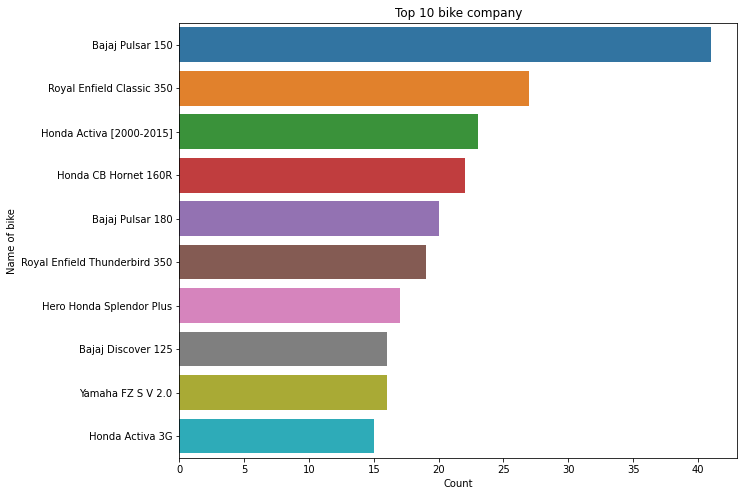

In [13]:
top_bike_company = df['name'].value_counts().head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x = top_bike_company, y = top_bike_company.index)
plt.ylabel('Name of bike')
plt.title('Top 10 bike company')
plt.xlabel('Count')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

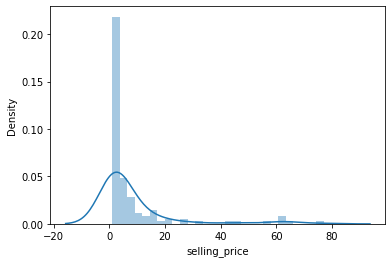

In [14]:
sns.distplot(df['selling_price'].value_counts())

<AxesSubplot:xlabel='year', ylabel='count'>

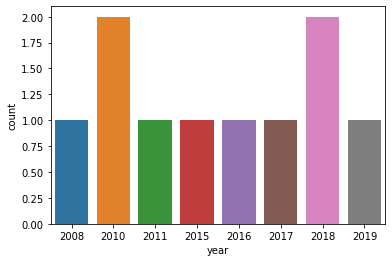

In [15]:
sns.countplot(x=df['year'].head(10))

<AxesSubplot:xlabel='seller_type', ylabel='count'>

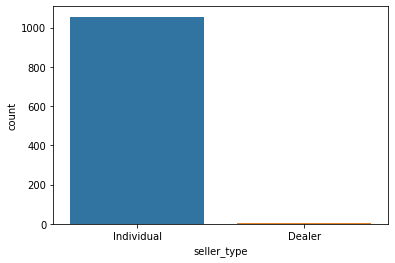

In [16]:
sns.countplot(x=df['seller_type'], data=df)

# Handling the Categorical values 

In [17]:
# we can convert categorical data to binary data through OneHotEncoder method or get_dummies method

In [18]:
df=pd.get_dummies(df,columns=['owner','seller_type'],drop_first=True)
'''
or
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first')
enc=pd.DataFrame(encoder.fit_transform(df[['owner']]).toarray())
'''

"\nor\nfrom sklearn.preprocessing import OneHotEncoder\nencoder=OneHotEncoder(drop='first')\nenc=pd.DataFrame(encoder.fit_transform(df[['owner']]).toarray())\n"

In [19]:
def bike_model(model_name, excl_honda_hero=False):
    model_list = []
    if excl_honda_hero:
        for i in df['name']:
            if model_name in i and 'Hero' not in i:
                model_list.append(i)
        return model_list
    else:
        for i in df['name']:
            if model_name in i:
                model_list.append(i)
        return model_list


In [20]:
royal_enfield = bike_model('Royal Enfield')
honda = bike_model('Honda',excl_honda_hero=True)
bajaj = bike_model('Bajaj')
yamaha = bike_model('Yamaha')
suzuki = bike_model('Suzuki')
hero = bike_model('Hero')
tvs = bike_model('TVS')
ktm = bike_model('KTM')

In [21]:
def brand(i):
    if i in royal_enfield:
        return 'Royal Enfield'
    elif i in honda:
        return 'Honda'
    elif i in bajaj:
        return 'Bajaj'
    elif i in yamaha:
        return 'Yamaha'
    elif i in hero:
        return 'Hero'    
    elif i in tvs:
        return 'TVS'    
    elif i in suzuki:
        return 'Suzuki'  
    elif i in ktm:
        return 'KTM' 
    else:
        return 'Other'

In [22]:
df['brand'] = df['name'].apply(lambda x:brand(x))
df.head()

,name,selling_price,year,km_driven,ex_showroom_price,owner_2nd owner,owner_3rd owner,owner_4th owner,seller_type_Individual,brand
0,Royal Enfield Classic 350,175000,2019,350,72752.5,0,0,0,1,Royal Enfield
1,Honda Dio,45000,2017,5650,72752.5,0,0,0,1,Honda
2,Royal Enfield Classic Gunmetal Grey,150000,2018,12000,148114.0,0,0,0,1,Royal Enfield
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,23000,89643.0,0,0,0,1,Yamaha
4,Yamaha SZ [2013-2014],20000,2011,21000,72752.5,1,0,0,1,Yamaha


<!-- Name Column is a categorical Variable so we will drop this Column -->

In [23]:
df=df.drop('name',axis='columns')

In [24]:
df= pd.get_dummies(df, columns=['brand'], drop_first=True)

In [25]:
x=df.drop('selling_price',axis='columns')
y=df['selling_price']

## Train Test Split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# Data Modeling

In [27]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [28]:
print("Model Intercept: ",lin_reg.intercept_)
print("Model Coefficient: ",lin_reg.coef_)
print("Model Coefficient: ",sum(lin_reg.coef_))


Model Intercept:  -7378244.053604637
Model Coefficient:  [ 3.67555304e+03 -4.31636574e-02  5.31133013e-01 -5.68265614e+03
  1.97106293e+04  1.78218123e+04 -1.41637480e+04 -3.77752986e+03
 -3.14007480e+03  8.45983695e+04  2.08886295e+04  5.98193684e+04
 -1.08881358e+03  3.21982099e+03  5.13215333e+03]
Model Coefficient:  187014.0018849024


In [29]:
y_pred_test=lin_reg.predict(x_test)
y_pred_train=lin_reg.predict(x_train)

In [30]:
lin_reg

LinearRegression()

In [31]:
lin_reg.predict([[2019,350,72752.5,0,0,0,1,0,0,0,0,1,0,0,0]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([126979.29749026])

In [32]:
sum(y_pred_train)

46420892.00000158

In [33]:
train_res=y_train-y_pred_train
test_res=y_test-y_pred_test

In [34]:
train_res

950    -1056.951098
782    -1069.378083
749   -19049.202127
381   -24245.328807
958    15516.206691
           ...     
337    -4168.860505
502    17390.550009
675     1370.210492
853     9162.222489
866   -70408.846196
Name: selling_price, Length: 795, dtype: float64

In [35]:
test_res

105    18128.875915
971   -48972.025308
461    -3816.790146
754    22255.880623
230     1717.231501
           ...     
662   -18087.661904
519     5830.945276
635     2090.762243
194   -16176.087586
916   -15137.524791
Name: selling_price, Length: 266, dtype: float64

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### Mean Squared error and Root Mean Squared error

In [37]:
mse=mean_squared_error(y_test,y_pred_test)
mse

1064870473.0227611

In [38]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_train

528138316.53659874

In [39]:
rmse=np.sqrt(mse)
rmse

32632.353164041986

In [40]:
rmse=np.sqrt(mse_train)
rmse

22981.2601163774

In [41]:
lin_reg.score(x_train,y_train)

0.818041848370445

In [42]:
lin_reg.score(x_test,y_test)

0.7297034397025874

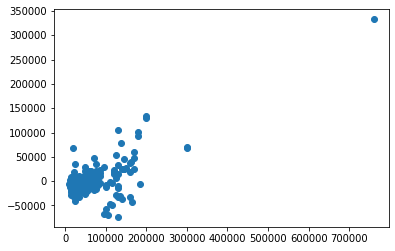

In [43]:
plt.scatter(y_test,test_res)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

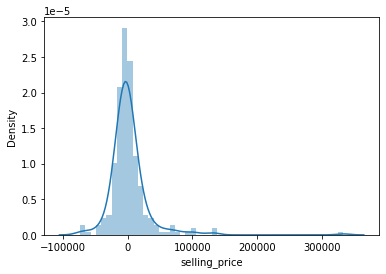

In [44]:
sns.distplot(test_res,kde=True)

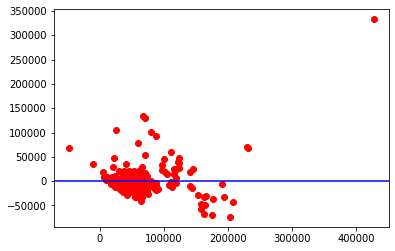

In [45]:
plt.scatter(y_pred_test,test_res,c='r')
plt.axhline(y=0,color='blue')

In [46]:
import statsmodels.formula.api as smf
model1=smf.ols('y~x',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     272.6
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:11:10   Log-Likelihood:                -12266.
No. Observations:                1061   AIC:                         2.456e+04
Df Residuals:                    1045   BIC:                         2.464e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.201e+06   4.06e+05    -17.715      0.000      -8e+06    -6.4e+06
x[0]        3582.7039    201.943     17.741      0.000    3186.444    3978.964
x[1]          -0.0364      0.017     -2.179      0.030      -0.069      -0.004
x[2]           0.5959      0.015     40.585      0.000       0.567       0.625
x[3]       -5577.7978   2512.229     -2.220      0.027   -1.05e+04    -648.211
x[4]        2.029e+04   7915.992      2.563      0.011    4754.873    3.58e+04
x[5]        6203.1532   1.57e+04      0.395      0.693   -2.46e+04     3.7e+04
x[6]       -8504.5739   1.05e+04     -0.808      0.419   -2.91e+04    1.21e+04
x[7]       -5210.9224   2322.398     -2.244      0.025   -9768.016    -653.828
x[8]       -3935.8774   2418.645     -1.627      0.104   -8681.831     810.076
x[9]          7.6e+04   5529.175     13.745      0.000    6.51e+04    8.68e+04
x[10]       1.672e+04   5289.319      3.160      0.002    6337.309    2.71e+04
x[11]       5.675e+04   2982.476     19.029      0.000    5.09e+04    6.26e+04
x[12]       7952.5339   4961.751      1.603      0.109   -1783.595    1.77e+04
x[13]       3307.3299   3476.214      0.951      0.342   -3513.825    1.01e+04
x[14]       2101.5975   3023.855      0.695      0.487   -3831.922    8035.117
==============================================================================
Omnibus:                      728.287   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23729.204
Skew:                           2.687   Prob(JB):                         0.00
Kurtosis:                      25.536   Cond. No.                     5.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Saving model and Converting

In [47]:
from joblib import dump, load

In [48]:
dump(lin_reg,"motor_cycle_prediction.joblib")

['motor_cycle_prediction.joblib']

In [49]:
#Deployment

In [50]:
loaded_lin=load("motor_cycle_prediction.joblib")

In [51]:
loaded_model=load("motor_cycle_prediction.joblib")

In [52]:
loaded_model.predict([[2019,350,72752.5,0,0,0,1,0,0,0,0,1,0,0,0]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([126979.29749026])